# Explore the Marine Biodiversity and Environmental Data Package with `mlcroissant`

## Introduction
This dataset from **Borja et al.** provides 28 years of environmental monitoring data (1995–2023) tracks 130 environmental variables across water, sediments, and biota in the Basque Country’s coastal areas. Developed with the Basque Water Agency (URA), it enables analysis of human impacts and ecosystem management.

Learn more:
- Data Package doi: [10.71728/r1rj-f947](https://sen.science/doi/10.71728/r1rj-f947)
- Frontiers Data Article doi: [10.3389/focsu.2024.1528837](https:.//doi.org/10.3389/focsu.2024.1528837)

As a FAIR² Data Package, it ensures accessibility, interoperability, and AI-readiness, supporting research and policy aligned with European directives. FAIR² datasets follow the MLCommons **Croissant** 🥐 format for machine learning datasets. See the [MLCommons Croissant Format Specification](https://docs.mlcommons.org/croissant/docs/croissant-spec.html).

This notebook provides a step-by-step guide for loading the dataset using the `mlcroissant` Python library.

### Install and import required libraries

In [ ]:
# Install mlcroissant from the source
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
!pip install mlcroissant

In [1]:
import mlcroissant as mlc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tabulate import tabulate
from IPython.display import Markdown

## 1. Data Loading
Load metadata and records from the dataset using `mlcroissant` and the URL of the FAIR<sup>2</sup> Data Package.

In [2]:
# Provide the dataset URL
# url = 'https://sen.science/doi/10.71728/r1rj-f947/fair2.json'
url = "../../fair2-spec/examples/example-1/borja2025.json"
# Load the dataset metadata
dataset = mlc.Dataset(url)
metadata = dataset.metadata.to_json()
print(f"{metadata['name']}: {metadata['description']}")

Borja_2025_Marine_Biodiversity_and_Environmental_Data_Dataset: This dataset provides 28 years of environmental monitoring data (1995–2023) from 51 stations in the estuaries and coastal areas of the Basque Country in the Bay of Biscay. Covering 130 variables across water, sediments, and biota, it includes detailed records of phytoplankton, macroalgae, macroinvertebrates, and fish. Compiled in collaboration with the Basque Water Agency (URA), the dataset supports analysis of environmental responses to human pressures and management interventions, identifying patterns of environmental quality improvement within a context of natural variability. Provided in a FAIR² Data Package, the dataset is structured to ensure Findability, Accessibility, Interoperability, Reusability, and Artificial Intelligence-readiness, facilitated by structured metadata and Application Programming Interface access. This resource is intended for researchers and policymakers examining anthropogenic and natural influe

## 2. Data Overview

In the **Croissant** format, a RecordSet represents a structured collection of records, where each record is a granular dataset unit (e.g., an image, text file, or table row). It defines the structure of these records using a set of fields, such as the columns in a table or sheet, as seen in this example.

### 2.1 Review available RecordSets

In [3]:
# Format the list column as a Markdown-compatible string
def format_list_column(row):
    if isinstance(row, list):
        return "\n".join(f"- {item}" for item in row)  # Bullet point list
    return str(row)

In [4]:
# List all the record sets available in the dataset
df = pd.DataFrame(metadata["recordSet"])
columns_to_keep = {
    "@id": "Record Set ID",
    "description": "Description"
}
df = df[list(columns_to_keep.keys())]
df = df.rename(columns=columns_to_keep)

# Convert DataFrame to Markdown table
markdown_table = tabulate(df, headers="keys", tablefmt="pipe", showindex=False)

# Render the table as Markdown in Jupyter
display(Markdown(markdown_table))

| Record Set ID                                                             | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
|:--------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| https://sen.science/doi/10.71728/r1rj-f947/record-sets/README             | The datasheet encompasses metadata and biodiversity data related to diverse aquatic environments. It includes information on taxonomic groups, site-specific sampling identifiers, sampling methods, and descriptions of instruments used. Examples include fish and Gillnetting, with references to specific sites like LTER_400. The data covers various descriptive fields such as taxonomic classification, site, and method details, providing a comprehensive overview of aquatic biodiversity research.                                                                            |
| https://sen.science/doi/10.71728/r1rj-f947/record-sets/METADATA           | The datasheet contains metadata about environmental sampling in the Bay of Biscay, Spain. It details locations (site names and IDs), geographical coordinates, and timespan of data collection from 1989 to 2023. It categorizes samples into taxa groups and provides protocols for sampling. Contact information for involved researchers is included, listing names and emails. The dataset covers various taxa such as water, macroalgae, and invertebrates, and is collected consistently across multiple years and sites.                                                           |
| https://sen.science/doi/10.71728/r1rj-f947/record-sets/WATER              | The dataset contains water quality measurements, including parameters like temperature, salinity, dissolved oxygen, and pH, collected from various sites. It includes metadata such as date collected, site ID, sample ID, and record basis. The dataset also provides depth information and sampling effort, with parameter values and standard units. The data spans multiple years, with repeated observations for several parameters across different locations.                                                                                                                      |
| https://sen.science/doi/10.71728/r1rj-f947/record-sets/BIOTA              | The dataset captures biota sample information, detailing collection dates, locations, sample IDs, and species (taxonomy) names with corresponding IDs. It includes environmental parameters measured in biota, the units of these measurements, and specific measurement values. The dataset uniformly records specimens as "Frozen Specimen" from intertidal zones, with consistent sampling efforts noted. Key taxa include "Mytilus galloprovincialis," "Magallana gigas," and "Magallana angulata." It offers insight into biotic composition and related environmental observations. |
| https://sen.science/doi/10.71728/r1rj-f947/record-sets/SEDIMENTS          | The dataset captures sediment samples with details on collection dates, site IDs, and sample IDs. It includes metadata such as basis of record, depth measurements, and sampling effort. Key parameters measured include organic matter percentage, gravel, mud, and metal concentrations, alongside redox potential, with respective values and standard units. The dataset provides insights into sediment composition and characteristics across various sites and depths, offering valuable information for environmental and geological studies.                                     |
| https://sen.science/doi/10.71728/r1rj-f947/record-sets/PHYTOPLANKTON      | The dataset records phytoplankton abundance, collected at various sites on specific dates, identified by unique sample IDs. It includes taxonomic information, depth measurements, and consistent recording effort. All observations, based on material samples, use standardized units and focus on abundance parameters, providing insights into phytoplankton distribution across different locations and times. The dataset is comprehensive, with no missing values, facilitating detailed ecological studies and analysis.                                                          |
| https://sen.science/doi/10.71728/r1rj-f947/record-sets/MACROALGAE         | The dataset contains macroalgae observations, detailing collection dates, site identifiers, sample identifiers, and taxonomic data. Observations are consistently recorded as human observations in intertidal zones, with a constant sampling effort and depth range. Each entry includes a taxon name and ID, with coverage percentages as measured parameters, all standardized in percentage units. The data provides a comprehensive record of macroalgae coverage across various sites over time.                                                                                   |
| https://sen.science/doi/10.71728/r1rj-f947/record-sets/INVERTEBRATES      | The datasheet documents invertebrate abundance across various sites and dates, detailing parameters like site ID, sample ID, taxonomic names, and their corresponding IDs. It includes metadata such as depth, sampling effort, and records classified as "MaterialSample." The dataset captures both minimum and maximum depths, with a consistent unit of "Ind/m2" for parameter values, focusing on invertebrate sampling efforts and abundance.                                                                                                                                       |
| https://sen.science/doi/10.71728/r1rj-f947/record-sets/FISH               | The datasheet contains data on fish abundance collected from various sites over a span of years. It includes details like site IDs, sample IDs, collection dates, and taxonomic information. Depth measurements, both minimum and maximum, are recorded along with sampling efforts. The observations are categorized under a "HumanObservation" record type and parameterized by abundance with values expressed in two unit variations, "Ind" and "ind".                                                                                                                                |
| https://sen.science/doi/10.71728/r1rj-f947/record-sets/METHOD             | The datasheet contains information on environmental sampling protocols, detailing various taxa groups like sediments, water, and biota, alongside the instruments used, sampling protocols, and references to related documentation. Descriptions provide insights into the sampling frequency and methodology in different environments, such as coastal and estuarine areas. The data offers metadata linked to scientific studies and protocols, emphasizing the procedural aspects of environmental monitoring.                                                                       |
| https://sen.science/doi/10.71728/r1rj-f947/record-sets/AUTHORS            | The datasheet contains information about authors, including their last names, first names, and middle initials. It includes details on whether they are in the author list, their email addresses, ORCID identifiers, and affiliations with departments and institutions. Additionally, it provides institutional details such as street addresses, city, zip code, and country. Most authors are affiliated with AZTI and are based in Spain, with Pasaia being a frequent city of affiliation.                                                                                          |
| https://sen.science/doi/10.71728/r1rj-f947/record-sets/ANALYTICAL_METHODS | The datasheet provides analytical data on various environmental subgroups, detailing chemical parameters and their respective units. It includes information on analysis methods and codes, capturing diverse testing techniques like gas chromatography and mass spectrometry. The fields cover distinct categories such as sediments, water, and biota, and feature alphanumeric codes for specific chemicals or compounds analyzed. The datasheet appears to structure metadata essential for understanding environmental chemical analysis.                                           |

## 3. Data Extraction

#### 3.1 Load data from a specific record set into a DataFrame for analysis. 

In this example we will focus on the data records related to the biodiversity of the sampled areas (phytoplankton, invertebrates, macroalgae, and fish). To that end we can use the RecordSet `@id`s from the overview

In [5]:
record_set_ids = [
    'https://sen.science/doi/10.71728/r1rj-f947/record-sets/PHYTOPLANKTON',
    'https://sen.science/doi/10.71728/r1rj-f947/record-sets/INVERTEBRATES',
    'https://sen.science/doi/10.71728/r1rj-f947/record-sets/MACROALGAE',
    'https://sen.science/doi/10.71728/r1rj-f947/record-sets/FISH'
]

dataframes = {
    record_set_id: pd.DataFrame(list(dataset.records(record_set=record_set_id)))
    for record_set_id in record_set_ids
}

In [6]:
prefix = "https://sen.science/doi/10.71728/r1rj-f947/"

for name, df in dataframes.items():
    df.rename(columns=lambda x: x.replace(prefix, "").split("/")[-1], inplace=True)

In [7]:
# Display the first rows of each dataframe
for name, df in dataframes.items():
    display(Markdown(f"#### {name}"))
    display(df.head())
    display(Markdown("---"))

#### https://sen.science/doi/10.71728/r1rj-f947/record-sets/PHYTOPLANKTON

,datecollected,siteid,sampleid,basisofrecord,minimumdepthinmeters,maximumdepthinmeters,taxaname,taxanameid,samplingeffort,parameter,parameter_value,parameter_standardunit
0,2002-04-22,b'E-BI10',b'E-BI10_20020422',b'MaterialSample',0.0,0.5,b'Cryptomonas',106282.0,b'125 ml',b'Abundance',4.20,b'cel/ml'
1,2002-04-22,b'E-BI10',b'E-BI10_20020422',b'MaterialSample',0.0,0.5,b'Eutreptiella',17657.0,b'125 ml',b'Abundance',170.00,b'cel/ml'
2,2002-04-22,b'E-BI10',b'E-BI10_20020422',b'MaterialSample',0.0,0.5,b'Melosira varians',149043.0,b'125 ml',b'Abundance',0.24,b'cel/ml'
3,2002-04-22,b'E-BI10',b'E-BI10_20020422',b'MaterialSample',0.0,0.5,b'Melosira\xc2\xa0nummuloides',149044.0,b'125 ml',b'Abundance',1.28,b'cel/ml'
4,2002-04-22,b'E-BI10',b'E-BI10_20020422',b'MaterialSample',0.0,0.5,b'Navicula',149142.0,b'125 ml',b'Abundance',94.00,b'cel/ml'


---

#### https://sen.science/doi/10.71728/r1rj-f947/record-sets/INVERTEBRATES

,datecollected,siteid,sampleid,basisofrecord,minimumdepthinmeters,maximumdepthinmeters,taxaname,taxanameid,samplingeffort,parameter,parameter_value,parameter_standardunit
0,2010-01-20,b'E-A5',b'E-A5_20100120',b'MaterialSample',b'Intertidal',b'Intertidal',b'Potamopyrgus antipodarum',147123.0,b'0.25 m2 * 3',b'Abundance',5.33,b'Ind/m2'
1,2013-01-30,b'E-A5',b'E-A5_20130130',b'MaterialSample',b'Intertidal',b'Intertidal',b'Trematoda',19948.0,b'0.25 m2 * 3',b'Abundance',1.33,b'Ind/m2'
2,2016-01-26,b'E-A5',b'E-A5_20160126',b'MaterialSample',b'Intertidal',b'Intertidal',b'NEMERTEA',152391.0,b'0.25 m2 * 3',b'Abundance',1.00,b'Ind/m2'
3,2019-01-21,b'E-A5',b'E-A5_20190121',b'MaterialSample',b'Intertidal',b'Intertidal',b'NEMERTEA',152391.0,b'0.25 m2 * 3',b'Abundance',3.00,b'Ind/m2'
4,2021-03-15,b'E-A5',b'E-A5_20210315',b'MaterialSample',b'Intertidal',b'Intertidal',b'NEMERTEA',152391.0,b'0.25 m2 * 3',b'Abundance',1.00,b'Ind/m2'


---

#### https://sen.science/doi/10.71728/r1rj-f947/record-sets/MACROALGAE

,datecollected,siteid,sampleid,basisofrecord,minimumdepthinmeters,maximumdepthinmeters,taxaname,taxanameid,samplingeffort,parameter,parameter_value,parameter_standardunit
0,2002-05-22,b'M-EA1',b'M-EA1_20020522',b'HumanObservation',b'Intertidal',b'Intertidal',b'Enteromorpha sp.',144294.0,b'0.25 m2',b'Coverage',37.5,b'%'
1,2005-06-06,b'M-EA1',b'M-EA1_20050606',b'HumanObservation',b'Intertidal',b'Intertidal',b'Enteromorpha sp.',144294.0,b'0.25 m2',b'Coverage',87.5,b'%'
2,2008-06-03,b'M-EA1',b'M-EA1_20080603',b'HumanObservation',b'Intertidal',b'Intertidal',b'Enteromorpha sp.',144294.0,b'0.25 m2',b'Coverage',87.5,b'%'
3,2011-05-05,b'M-EA1',b'M-EA1_20110505',b'HumanObservation',b'Intertidal',b'Intertidal',b'Enteromorpha sp.',144294.0,b'0.25 m2',b'Coverage',87.5,b'%'
4,2014-05-14,b'M-EA1',b'M-EA1_20140514',b'HumanObservation',b'Intertidal',b'Intertidal',b'Enteromorpha sp.',144294.0,b'0.25 m2',b'Coverage',87.5,b'%'


---

#### https://sen.science/doi/10.71728/r1rj-f947/record-sets/FISH

,datecollected,siteid,sampleid,basisofrecord,minimumdepthinmeters,maximumdepthinmeters,taxaname,taxanameid,samplingeffort,parameter,parameter_value,parameter_standardunit
0,2008-09-26,b'AAE',b'AAE_20080926',b'HumanObservation',0.0,4.0,b'Palaemon sp.',107032.0,"b'Three hauls, 1.5 m wide beam trawl, net of 1...",b'Abundance',1.0,b'ind'
1,2017-10-11,b'AAE',b'AAE_20171011',b'HumanObservation',0.0,4.0,b'Palaemon sp.',107032.0,"b'Three hauls, 1.5 m wide beam trawl, net of 1...",b'Abundance',2.0,b'Ind'
2,2020-10-08,b'AAE',b'AAE_20201008',b'HumanObservation',0.0,4.0,b'Palaemon sp.',107032.0,"b'Three hauls, 1.5 m wide beam trawl, net of 1...",b'Abundance',3.0,b'Ind'
3,2002-09-19,b'AAE',b'AAE_20020919',b'HumanObservation',0.0,4.0,b'Crangon crangon',107552.0,"b'Three hauls, 1.5 m wide beam trawl, net of 1...",b'Abundance',2.0,b'ind'
4,2017-10-11,b'AAE',b'AAE_20171011',b'HumanObservation',0.0,4.0,b'Crangon crangon',107552.0,"b'Three hauls, 1.5 m wide beam trawl, net of 1...",b'Abundance',4.0,b'Ind'


---

From the preview, we can see that the tables contain population data for various species, categorized by taxonomic name (taxa). For phytoplankton, invertebrates, and fish, the dataset records species abundance, while macroalgae are measured in terms of coverage percentage.

## 4. Exploratory Data Analysis (EDA)

To grasp the dataset’s key characteristics, identify patterns, and detect anomalies, we begin with Exploratory Data Analysis (EDA).

### 4.1 Identify missing values
Check the size and completeness of the dataframes

In [8]:
for name, df in dataframes.items():
    missing_columns = df.columns[df.isnull().any()].tolist()
    if missing_columns:
        print(f"Dataframe '{name}' has missing values in columns: {missing_columns}")
    else:
        print(f"Dataframe '{name}' has no missing values.")

Dataframe 'https://sen.science/doi/10.71728/r1rj-f947/record-sets/PHYTOPLANKTON' has no missing values.
Dataframe 'https://sen.science/doi/10.71728/r1rj-f947/record-sets/INVERTEBRATES' has no missing values.
Dataframe 'https://sen.science/doi/10.71728/r1rj-f947/record-sets/MACROALGAE' has no missing values.
Dataframe 'https://sen.science/doi/10.71728/r1rj-f947/record-sets/FISH' has no missing values.


### 4.2 Summary statistics

As seen in Section 2, our initial exploration revealed that the dataset captures biodiversity trends in the sampled regions of the Bay of Biscay over the years. This includes species abundance—measured as the number of individual specimens or, in the case of algae, as surface coverage. Given this, it is essential to examine the statistical summaries of these measurements for each dataframe.

In [9]:
summary_stats_dict = {}
for name, df in dataframes.items():
    summary_stats = df.groupby('taxaname').agg({
        'parameter_value': ['mean', 'std', 'min', 'max', 'count']
    }).reset_index()
    summary_stats.columns = ['Taxa', 'Mean', 'Std', 'Min', 'Max', 'Count']
    
    # Order by count
    summary_stats = summary_stats.sort_values(by='Count', ascending=False)
    summary_stats_dict[name] = summary_stats
    
    display(Markdown(f"### Summary Statistics for {name.split('/')[-1].split('.csv')[0]} {df['parameter'][0]}"))
    display(summary_stats)
    display(Markdown("---"))

### Summary Statistics for PHYTOPLANKTON b'Abundance'

,Taxa,Mean,Std,Min,Max,Count
331,b'Plagioselmis',115.948598,374.732164,0.001,6159.600,1988
318,b'Pennales',103.285597,349.168496,0.001,7986.240,1864
187,b'Gymnodiniales',24.016398,37.842873,0.001,875.088,1564
396,b'Pyramimonas',45.614601,150.259149,0.001,2463.840,1511
447,b'Teleaulax',98.015364,409.773832,0.001,7858.800,1446
...,...,...,...,...,...,...
202,b'Halosphaera',0.001000,NaN,0.001,0.001,1
430,b'Scrippsiella precaria',8.496000,NaN,8.496,8.496,1
208,b'Helicotheca',0.001000,NaN,0.001,0.001,1
217,b'Heterodinium milneri',0.020000,NaN,0.020,0.020,1


---

### Summary Statistics for INVERTEBRATES b'Abundance'

,Taxa,Mean,Std,Min,Max,Count
942,b'Oligochaeta',430.678620,1267.729420,0.67,14997.33,652
234,b'Capitella capitata',502.023098,2019.363131,0.67,35484.75,510
587,b'Hediste diversicolor',148.624711,310.971083,0.67,2838.42,484
347,b'Cyathura carinata',122.390000,196.125996,0.67,1417.00,450
1067,b'Peringia ulvae',159.076936,973.792231,1.00,18687.00,421
...,...,...,...,...,...,...
737,b'Lyonsiidae',0.670000,NaN,0.67,0.67,1
743,b'Lytocarpia myriophyllum',3.330000,NaN,3.33,3.33,1
1,b'ARABELLIDAE',3.330000,NaN,3.33,3.33,1
748,b'Macropodia linaresi',3.000000,NaN,3.00,3.00,1


---

### Summary Statistics for MACROALGAE b'Coverage'

,Taxa,Mean,Std,Min,Max,Count
188,b'Lithophyllum incrustans',41.128136,31.383030,0.1,87.5,1116
222,b'Patella intermedia',24.544166,20.706821,0.1,87.5,1037
71,b'Chthamalus sp.',28.088725,27.663079,0.1,87.5,1020
118,b'Ellisolandia elongata',39.021292,31.232549,0.1,87.5,944
202,b'Melarhaphe neritoides',23.088203,22.284158,0.1,87.5,907
...,...,...,...,...,...,...
90,b'Codium vermilara',0.100000,NaN,0.1,0.1,1
80,b'Cladophora pseudopellucida',0.100000,NaN,0.1,0.1,1
273,b'Spirobranchus polytrema',0.100000,NaN,0.1,0.1,1
274,b'Spongiidae',0.100000,NaN,0.1,0.1,1


---

### Summary Statistics for FISH b'Abundance'

,Taxa,Mean,Std,Min,Max,Count
14,b'Carcinus maenas',37.476440,88.956368,1.0,903.0,372
93,b'Pomatoschistus sp.',67.250000,128.046861,1.0,1094.0,360
42,b'Gobius niger',11.592857,27.270028,1.0,270.0,280
22,b'Crangon crangon',64.034615,184.882501,1.0,1845.0,260
109,b'Solea solea',11.492248,42.610282,1.0,616.0,258
...,...,...,...,...,...,...
83,b'Pandalina brevirostris',2.000000,NaN,2.0,2.0,1
94,b'Portumnus latipes',1.000000,NaN,1.0,1.0,1
95,b'Praunus flexuosus',1.000000,NaN,1.0,1.0,1
99,b'Processa spp.',1.000000,NaN,1.0,1.0,1


---

### Summary of Tables: Mean and Taxa Diversity

The dataset comprises multiple tables, each representing different categories of marine biodiversity data, including phytoplankton, invertebrates, macroalgae, and fish. Below is a summary focusing on the mean values and taxa diversity for each category:

1. **Phytoplankton**:
    - **Number of Unique Species**: 505
    - **Mean Abundance**: The dataset records the abundance of various phytoplankton species, with mean values calculated for each species. The mean abundance provides insights into the average population size of each species across different sampling sites and times.

2. **Invertebrates**:
    - **Number of Unique Species**: 1493
    - **Mean Abundance**: Invertebrate data includes a wide range of species with varying mean abundance values. The mean values help identify the most and least common invertebrate species in the sampled areas.

3. **Macroalgae**:
    - **Number of Unique Species**: 306
    - **Mean Coverage**: Unlike other categories, macroalgae are measured in terms of coverage percentage. The mean coverage values indicate the average surface area occupied by each macroalgae species, providing insights into their distribution and dominance in the ecosystem.

4. **Fish**:
    - **Number of Unique Species**: 132
    - **Mean Abundance**: Fish data includes species abundance measured in individual counts. The mean values highlight the average number of individuals per species, helping to understand the population dynamics of different fish species.

Overall, the dataset reveals significant diversity in marine species across different categories, with invertebrates showing the highest number of unique species. The mean values for each category provide valuable information on the average population sizes and coverage, aiding in the analysis of biodiversity trends and ecosystem health.

#### 4.2.1 Example: Exploring the Abundance of the FISH Category

We can take a look at the 10 most sampled unique fish taxa

In [10]:
# Select the first 10 Taxa names
top_10_taxa = summary_stats.head(10)

/var/folders/sr/rb0fdyrd6mj5vn4v5zcgw8vm0000gp/T/ipykernel_11533/1524115616.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(y='Count', x='Taxa', data=top_10_taxa, palette='viridis')


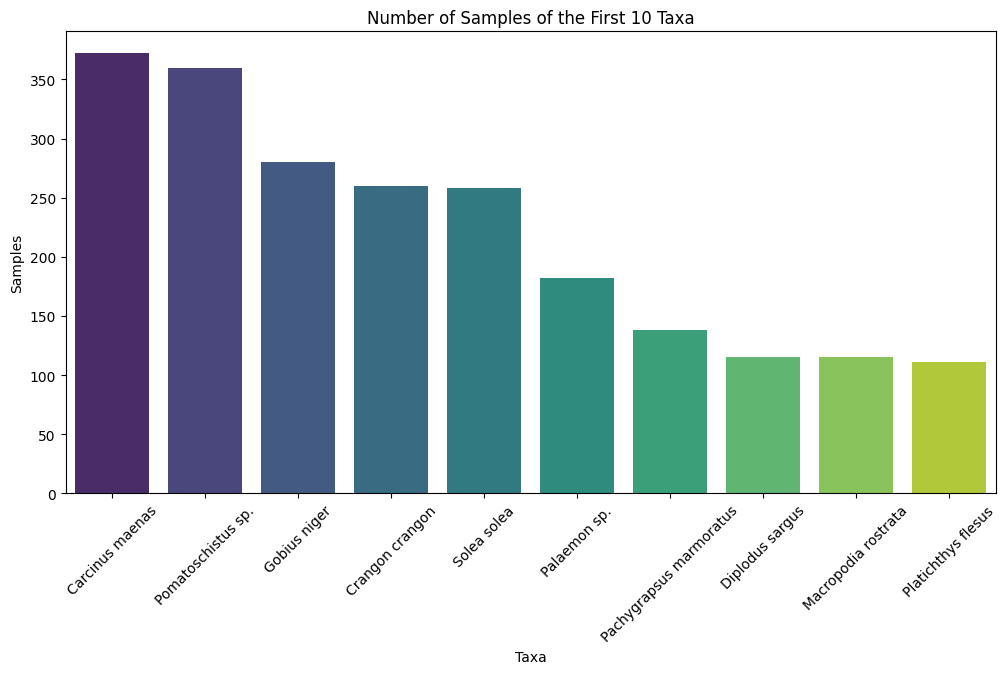

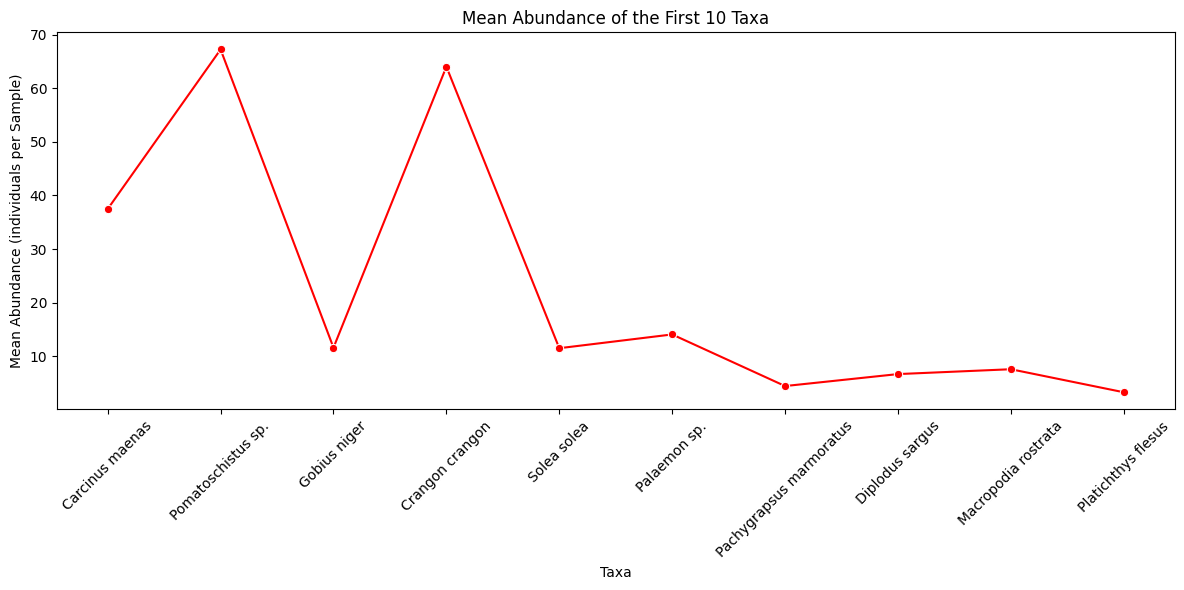

In [11]:
# Plot the count of the first 10 taxa vs the mean value of the parameter_value with inverted axeimport matplotlib.pyplot as plt
# Transform binary values to proper ones
df['parameter_value'] = df['parameter_value'].replace({0: 'Absent', 1: 'Present'})

# Create the first plot (Count)
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(y='Count', x='Taxa', data=top_10_taxa, palette='viridis')
ax1.set_ylabel('Samples')
ax1.set_xlabel('Taxa')
ax1.tick_params(axis='x', rotation=45)
plt.title(f"Number of Samples of the First 10 Taxa")

# Create the second plot (Mean)
plt.figure(figsize=(12, 6))
ax2 = sns.lineplot(y='Mean', x='Taxa', data=top_10_taxa, color='red', marker='o')
ax2.set_ylabel(f"Mean Abundance (individuals per Sample)")
ax2.set_xlabel('Taxa')
ax2.tick_params(axis='x', rotation=45)
plt.title(f"Mean Abundance of the First 10 Taxa")

plt.tight_layout()
plt.show()

The figure above illustrates the relationship between the number of samples and the mean abundance of the top 10 most sampled fish taxa. The bar plot represents the number of samples for each taxa, while the line plot shows the mean abundance of these taxa. The x-axis lists the taxa names, and the y-axis on the left indicates the number of samples, while the y-axis on the right shows the mean abundance in individual counts (ind). The plot highlights that the average abundance of species is not always proportional to the number of samples taken. For instance, the Gobius niger is relatively less abundant than the Crangon crangon fish, even though they were sampled almost the same number of times.

## 5. Analysis of the Biodiversity Over the Years

In this subsection we focuse on the evolution of the biodiversity richness over the years. See Figure 3 of the FAIR² Data Article.

In [12]:
x_column = 'datecollected'
new_x_column = "year_collected"

def x_transformation(df):
    # keep only the year
    return pd.to_datetime(df[x_column], format='%Y-%m-%d').dt.year

for name, df in dataframes.items():    
    # execute transformations
    df[new_x_column] = x_transformation(df)

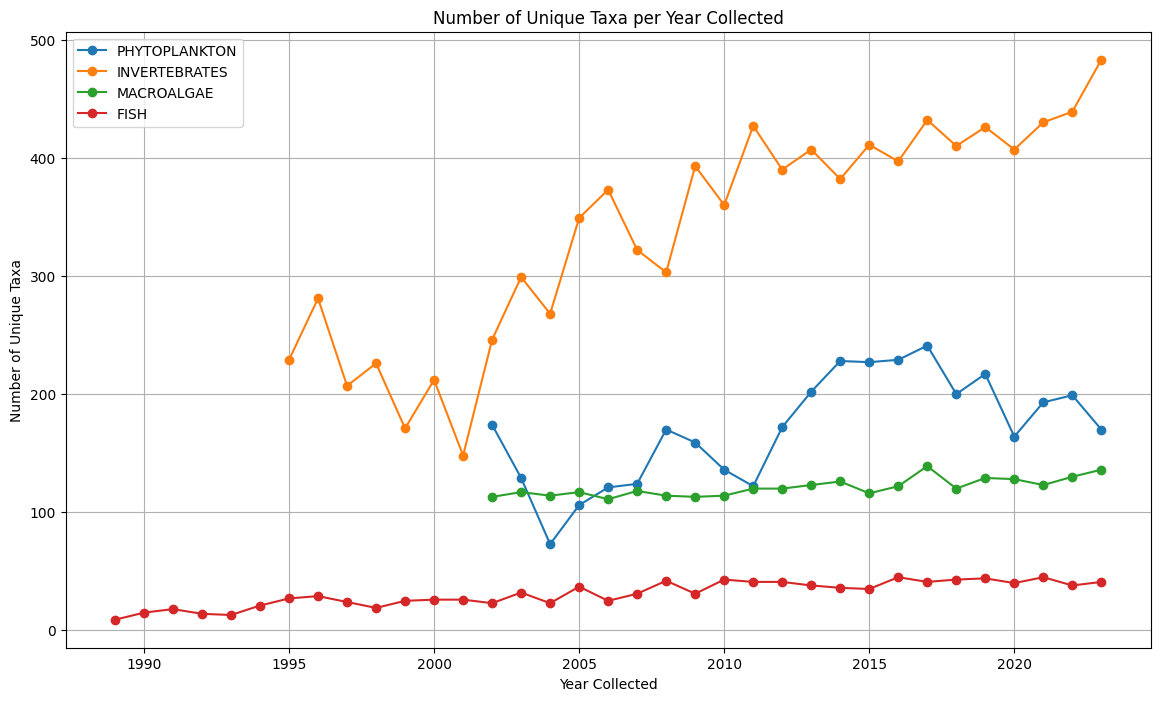

In [13]:
# Plot the change over the species diversity reachness (unique taxa) over the years
plt.figure(figsize=(14, 8))

for name, df in dataframes.items():
    unique_taxa_per_year = df.groupby('year_collected')['taxaname'].nunique().reset_index()
    plt.plot(unique_taxa_per_year['year_collected'], unique_taxa_per_year['taxaname'], marker='o', label=name.split('/')[-1])

plt.xlabel('Year Collected')
plt.ylabel('Number of Unique Taxa')
plt.title('Number of Unique Taxa per Year Collected')
plt.legend()
plt.grid(True)
plt.show()

The figure above illustrates the trend in the number of unique taxa collected each year from 1989 to 2023. Each line represents a different category of marine biodiversity data, including phytoplankton, invertebrates, macroalgae, and fish. The x-axis shows the years of data collection, while the y-axis indicates the number of unique taxa identified in each year. The plot highlights the changes in biodiversity richness over time, providing insights into the temporal dynamics of species diversity in the sampled regions. The overall trend shows fluctuations in the number of unique taxa, reflecting variations in environmental conditions and sampling efforts across different years.

## 5. Observations


1. **Dataset Overview**:
    - The dataset provides extensive long-term monitoring data from the Basque Country, covering various environmental variables across water, sediments, and biota.
    - The dataset includes multiple record sets, each representing different categories of marine biodiversity data, such as phytoplankton, invertebrates, macroalgae, and fish.

2. **Data Completeness**:
    - The dataframes for each record set were checked for missing values. Most dataframes had no missing values, indicating a high level of data completeness.

3. **Summary Statistics**:
    - Summary statistics were calculated for each record set, focusing on species abundance and coverage.
    - The dataset revealed significant diversity in marine species, with invertebrates showing the highest number of unique species (1493), followed by phytoplankton (505), macroalgae (306), and fish (132).

4. **Top 10 Most Sampled Fish Taxa**:
    - The top 10 most sampled fish taxa were identified, with Carcinus maenas being the most sampled species.
    - A plot illustrating the relationship between the number of samples and the mean abundance of these taxa showed that the average abundance of species is not always proportional to the number of samples taken.

5. **Biodiversity Trends Over the Years**:
    - The number of unique taxa collected each year from 1989 to 2023 was analyzed.
    - The plot showed fluctuations in the number of unique taxa over time, reflecting variations in environmental conditions and sampling efforts across different years.


Overall, the dataset reveals valuable information on marine biodiversity trends and ecosystem health in the Basque Country's coastal areas. The analysis highlights the richness and diversity of species, as well as temporal dynamics and potential correlations within the data.

## Conclusion
In this notebook, we successfully explored the Marine Biodiversity and Environmental Data Package using the `mlcroissant` library. We began by loading the dataset and reviewing its metadata, followed by extracting specific record sets into dataframes for detailed analysis. Through exploratory data analysis (EDA), we identified missing values, calculated summary statistics, and visualized the abundance of various taxa. Our analysis revealed significant biodiversity in the Basque Country's coastal areas, with invertebrates showing the highest number of unique species. We also examined the temporal trends in species diversity, highlighting fluctuations over the years. The insights gained from this dataset provide valuable information for understanding marine biodiversity trends and ecosystem health, supporting research and policy aligned with environmental management and conservation efforts.